In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics import mean_squared_error

In [58]:
def poly_reg(degree):
    poly_regr = Pipeline([("features",PolynomialFeatures(degree=degree)),
                         ("scaler",StandardScaler()),
                         ("regression",LinearRegression())])
    return poly_regr

In [59]:
np.random.seed(600)
x = np.random.uniform(-3,3,size=100).reshape(-1,1)
y = 0.5*x**2 + x + 2 + np.random.normal(0,1,size=100).reshape(-1,1)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
X_train.shape
X_test.shape

(25, 1)

In [61]:
def learningcurve(fuction,X_train,X_test,y_train,y_test):
    train_error = []
    test_error = []
    for i in range(1,len(X_train)+1):
        lin_reg = fuction
        lin_reg.fit(X_train[:i],y_train[:i])
        y_predict = fuction.predict(X_train[:i])
        train_error.append(mean_squared_error(y_predict,y_train[:i]))
        y_predict_test = fuction.predict(X_test)
        test_error.append(mean_squared_error(y_test,y_predict_test))
    return train_error,test_error

In [62]:
# train_error = []
# test_error = []
# for i in range(1,len(X_train)+1):
#     lin_reg = LinearRegression()
#     lin_reg.fit(X_train[:i],y_train[:i])
#     y_predict = lin_reg.predict(X_train[:i])
#     train_error.append(mean_squared_error(y_predict,y_train[:i]))
#     y_predict_test = lin_reg.predict(X_test)
#     test_error.append(mean_squared_error(y_test,y_predict_test))

In [63]:
poly2 = poly_reg(degree=2)
train_error,test_error = learningcurve(poly2,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [69]:
poly2 = poly_reg(degree=20)
train_error,test_error = learningcurve(poly2,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)


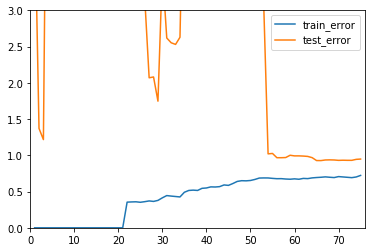

In [70]:
plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(train_error),label = "train_error")
plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(test_error),label = "test_error")
plt.axis([0,76,0,3])
plt.legend()
plt.show()